/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/3z/gjs8159j4pj4fhckh__lk6g00000gn/T/ipykernel_28841/2927635077.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))


Davies-Bouldin Index (K-means): 0.6623228649898679


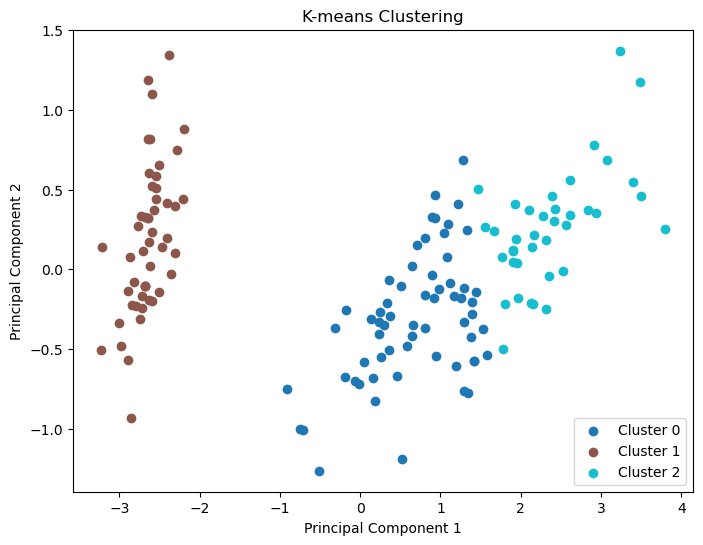

Davies-Bouldin Index (Agglomerative Clustering): 0.6566044124178442


/var/folders/3z/gjs8159j4pj4fhckh__lk6g00000gn/T/ipykernel_28841/2927635077.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))


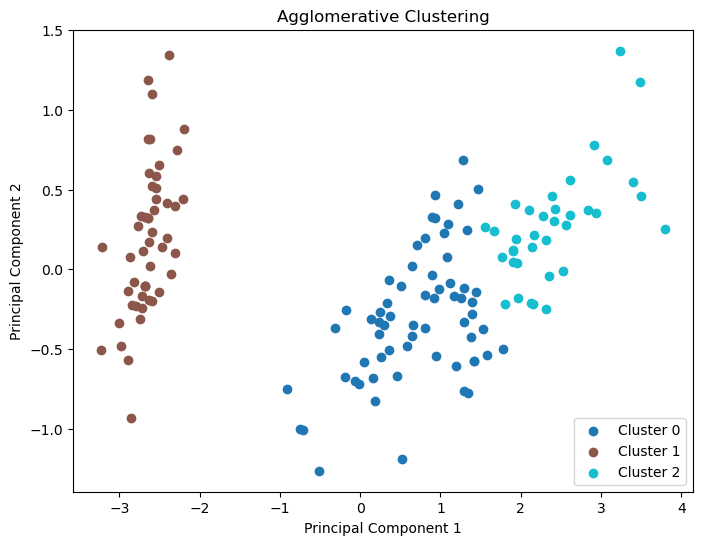

Davies-Bouldin Index (DBSCAN): 7.222826995273635


/var/folders/3z/gjs8159j4pj4fhckh__lk6g00000gn/T/ipykernel_28841/2927635077.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))


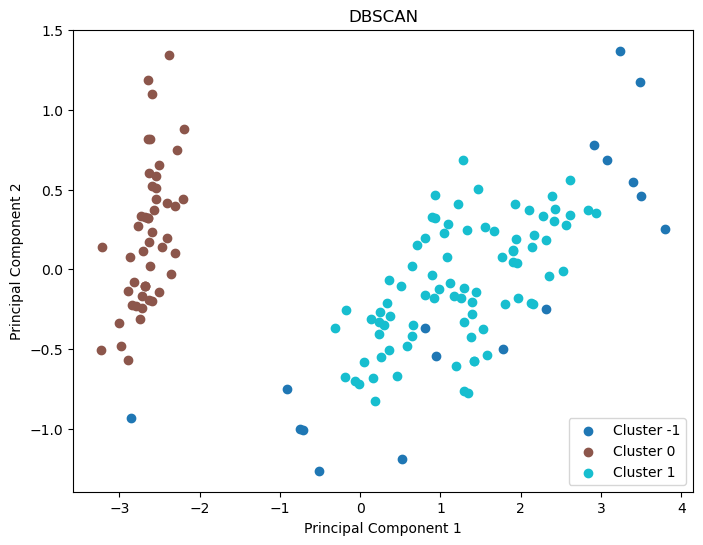

Davies-Bouldin Index (HDBSCAN): 0.3835952094491396


/var/folders/3z/gjs8159j4pj4fhckh__lk6g00000gn/T/ipykernel_28841/2927635077.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))


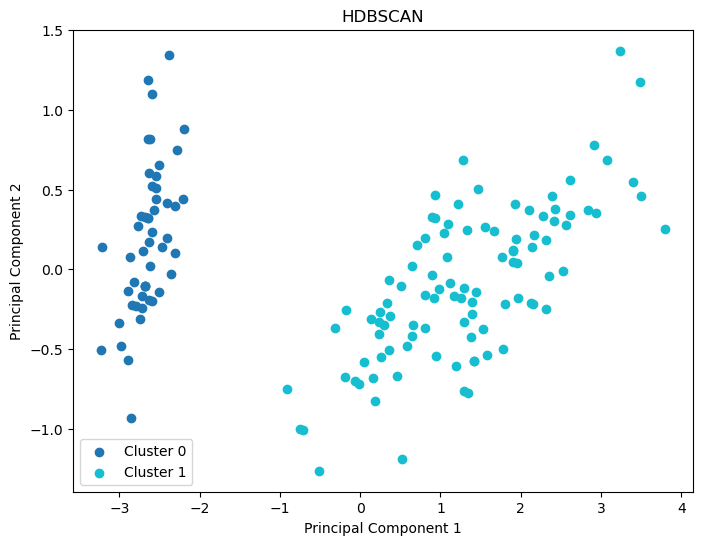

Davies-Bouldin Index (Fuzzy C-Means): 0.669601341865871


/var/folders/3z/gjs8159j4pj4fhckh__lk6g00000gn/T/ipykernel_28841/2927635077.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))


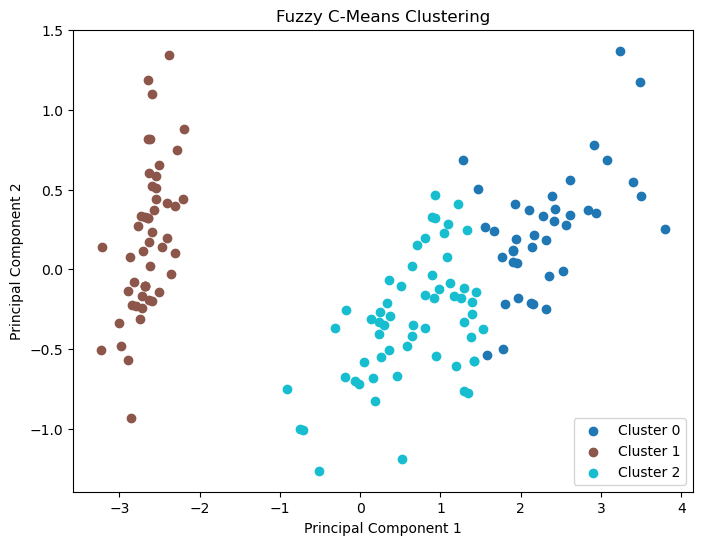


Davies-Bouldin Index comparison:
K-means: 0.6623228649898679
Agglomerative: 0.6566044124178442
DBSCAN: 7.222826995273635
HDBSCAN: 0.3835952094491396
Fuzzy C-Means: 0.669601341865871


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import hdbscan
import skfuzzy as fuzz

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 

# Function to visualize clustering
def plot_clusters(data, labels, title):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    principal_df['Cluster'] = labels

    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    colors = plt.cm.get_cmap("tab10", len(unique_labels))

    for i, label in enumerate(unique_labels):
        cluster_data = principal_df[principal_df['Cluster'] == label]
        plt.scatter(cluster_data['PC1'], cluster_data['PC2'], color=colors(i), label=f'Cluster {label}')
    
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.legend()
    plt.show()

# 1. K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
dbi_kmeans = davies_bouldin_score(X, kmeans_labels)
print(f"Davies-Bouldin Index (K-means): {dbi_kmeans}")
plot_clusters(X, kmeans_labels, 'K-means Clustering')

# 2. Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X)
dbi_agg = davies_bouldin_score(X, agg_labels)
print(f"Davies-Bouldin Index (Agglomerative Clustering): {dbi_agg}")
plot_clusters(X, agg_labels, 'Agglomerative Clustering')

# 3. DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
# For DBSCAN, some points may be labeled as -1 (outliers). Adjust DBI calculation accordingly
unique_labels_dbscan = len(np.unique(dbscan_labels))
if unique_labels_dbscan > 1:
    dbi_dbscan = davies_bouldin_score(X, dbscan_labels)
    print(f"Davies-Bouldin Index (DBSCAN): {dbi_dbscan}")
else:
    dbi_dbscan = float('inf')  # Indicating poor clustering
    print("DBSCAN resulted in a single cluster or could not cluster the data properly.")
plot_clusters(X, dbscan_labels, 'DBSCAN')

# 4. HDBSCAN
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
hdbscan_labels = hdbscan_clusterer.fit_predict(X)
# For HDBSCAN, some points may be labeled as -1 (outliers). Adjust DBI calculation accordingly
unique_labels_hdbscan = len(np.unique(hdbscan_labels))
if unique_labels_hdbscan > 1:
    dbi_hdbscan = davies_bouldin_score(X, hdbscan_labels)
    print(f"Davies-Bouldin Index (HDBSCAN): {dbi_hdbscan}")
else:
    dbi_hdbscan = float('inf')  # Indicating poor clustering
    print("HDBSCAN resulted in a single cluster or could not cluster the data properly.")
plot_clusters(X, hdbscan_labels, 'HDBSCAN')

# 5. Fuzzy C-Means Clustering
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(X.T, 3, 2, error=0.005, maxiter=1000, init=None)
fcm_labels = np.argmax(u, axis=0)
dbi_fcm = davies_bouldin_score(X, fcm_labels)
print(f"Davies-Bouldin Index (Fuzzy C-Means): {dbi_fcm}")
plot_clusters(X, fcm_labels, 'Fuzzy C-Means Clustering')

# Comparison of DBI values
dbi_values = {
    'K-means': dbi_kmeans,
    'Agglomerative': dbi_agg,
    'DBSCAN': dbi_dbscan,
    'HDBSCAN': dbi_hdbscan,
    'Fuzzy C-Means': dbi_fcm
}

print("\nDavies-Bouldin Index comparison:")
for method, dbi in dbi_values.items():
    print(f"{method}: {dbi}")
